In [3]:
from qiskit import QuantumCircuit, assemble, Aer
from qiskit.visualization import plot_histogram

### 1. Splitting Information into bits

Bits are considere dthe simplest alphabet. With only two characters, 0 and 1. Though we usually use this system based on the number 10, we can just as easily use one based on any other number. The binary number system, for example, is based on the number two. This means using the two characters 0 and 1 to express numbers as multiples of powers of two. For example, 9213 becomes 10001111111101, since 

    9213 = (1x2^13)+(0x2^12)+(0x2^11)+(0x2^10)+(1x2^9)+(1x2^8)+(1x2^7)+(1x2^6)+(1x2^5)+(1x2^4)+(1x2^3)+(1x2^2)+(0x2^1)+(1x2^0)
    



### 2. Computation as a diagram

Whether we are using qubits or bits, we need to manipulate them in order to turn the inputs we have into the outputs we need. For the simplest programs with very few bits, it is useful to represent this process in a diagram known as a circuit diagram. These have inputs on the left, outputs on the right, and operations represented by arcane symbols in between. These operations are called 'gates', mostly for historical reasons. Below is an image of basic logic gates. 

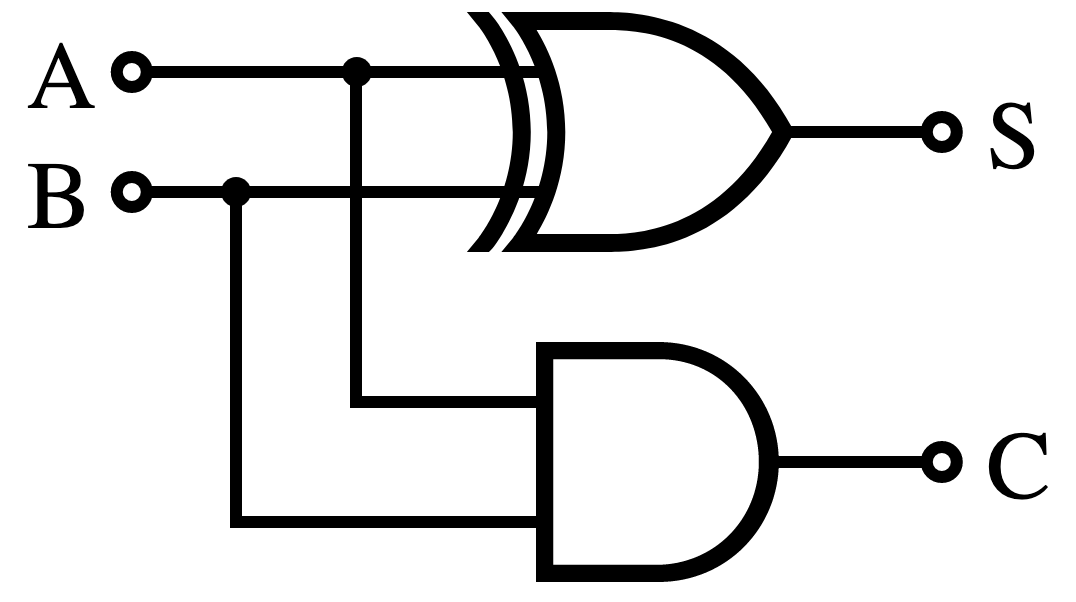

For quantum computers, we use the same basic idea but have different conventions for how to represent inputs, outputs, and the symbols used for operations. Here is the quantum circuit that rpresents the same process as baove.  

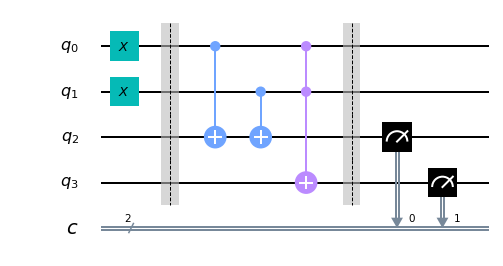

### 3. Your first quantum circuit

In a circuit, we typically need to do three jobs: First, encode the input, then do some actual computation, and finally extract an output. 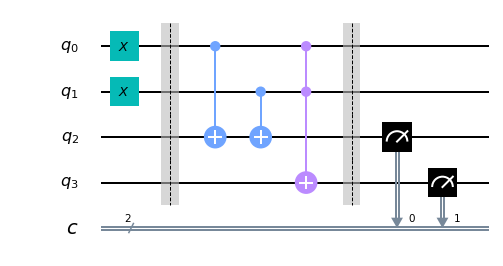

In [5]:
n = 8
n_q = n
n_b = n
qc_output = QuantumCircuit(n_q,n_b)

for j in range(n):
    qc_output.measure(j,j)
    
qc_output.draw()

┌─┐                     
q_0: ┤M├─────────────────────
     └╥┘┌─┐                  
q_1: ─╫─┤M├──────────────────
      ║ └╥┘┌─┐               
q_2: ─╫──╫─┤M├───────────────
      ║  ║ └╥┘┌─┐            
q_3: ─╫──╫──╫─┤M├────────────
      ║  ║  ║ └╥┘┌─┐         
q_4: ─╫──╫──╫──╫─┤M├─────────
      ║  ║  ║  ║ └╥┘┌─┐      
q_5: ─╫──╫──╫──╫──╫─┤M├──────
      ║  ║  ║  ║  ║ └╥┘┌─┐   
q_6: ─╫──╫──╫──╫──╫──╫─┤M├───
      ║  ║  ║  ║  ║  ║ └╥┘┌─┐
q_7: ─╫──╫──╫──╫──╫──╫──╫─┤M├
      ║  ║  ║  ║  ║  ║  ║ └╥┘
c: 8/═╩══╩══╩══╩══╩══╩══╩══╩═
      0  1  2  3  4  5  6  7

This circuit, which we have called qc_output, is created by Qiskit using QuantumCircuit. The number n_q defines the number of qubits in the circuit. With n_b we define the number of output bits we will extract from the circuit at the end.

The extraction of outputs in a quantum circuit is done using an operation called measure. Each measurement tells a specific qubit to give an output to a specific output bit. The following code adds a measure operation to each of our eight qubits. The qubits and bits are both labelled by the numbers from 0 to 7.The command qc.measure(j,j) adds a measurement to our circuit qc that tells qubit j to write an output to bit j. Qubits are always initialized to give the output 0. Since we don't do anything to our qubits in the circuit above, this is exactly the result we'll get when we measure them. We can see this by running the circuit many times and plotting the results in a histogram. We will find that the result is always 00000000: a 0 from each qubit.

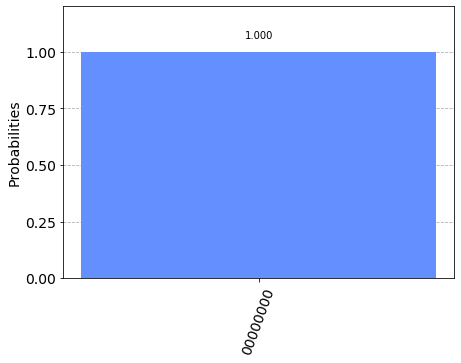

In [11]:
sim = Aer.get_backend('qasm_simulator')  # this is the simulator we'll use
qobj = assemble(qc_output)  # this turns the circuit into an object our backend can run
result = sim.run(qobj).result()  # we run the experiment and get the result from that experiment
# from the results, we get a dictionary containing the number of times (counts)
# each result appeared
counts = result.get_counts()
# and display it on a histogram
plot_histogram(counts)

The reason for running many times and showing the result as a histogram is because quantum computers may have some randomness in their results. In this case, since we aren’t doing anything quantum, we get just the 00000000 result with certainty.